## Polynomial Regression.

1. Downloading data
2. Polynomial regression
3. Evaluation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2019-10-26 14:41:24--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   148KB/s    in 0.5s    

2019-10-26 14:41:26 (148 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [4]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
arr = ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']
cdf = df[arr]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


[]

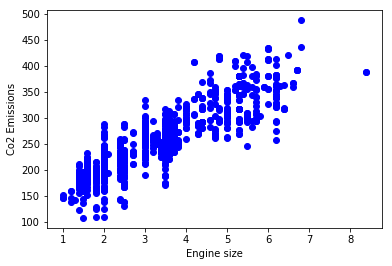

In [9]:
# Now, to visualize lets plot engine size wrt Co2 Emissions.
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='blue')
plt.xlabel('Engine size')
plt.ylabel('Co2 Emissions')
plt.plot()

In [11]:
# Now, its turn that we split our dataset into the train and the test dataset.
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
# train.head()

#### Now, sometimes the trend of data is always not linear and looks curvy. In such cases, we can use the polynomial regression methods, many such methods like quadratic regression, cubic regression etc exists.

1. Now, lets say we want to have a polynomial regresion(2 degree polynomial) where the equation is like 
2. y = a + b*x + c*x*x
3. Now, the important question is how do we test our data on the equation which has only x values. Well, we can create additional features,  1, x, x*2.

4. Now, we have a special thing called as PolynomialFeatures() in scikit learn, all it does is basically create a new featture set out of the current feature set according to the degree we specify in the function.


In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])


test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree = 3)
train_x_poly = poly.fit_transform(train_x) 
#SO, now in this train_x_poly, we will have the generated matrix according to the degree.
print(train_x_poly)

[[ 1.     2.     4.     8.   ]
 [ 1.     2.4    5.76  13.824]
 [ 1.     1.5    2.25   3.375]
 ...
 [ 1.     3.2   10.24  32.768]
 [ 1.     3.2   10.24  32.768]
 [ 1.     3.2   10.24  32.768]]


1. Now, this is to be taken care of here. The fit_transform function basically takes the x values and outputs a list of data with values that range from a power of 0 to a power of 3(Simply because we specified the degree to be 3)

2. The above we got looks like the feature set of multiple linear regression right  ? Indeed yes, all we have to do is basically take it as a + bx1 + cx2 and so on..

3. SO, the polynomial regression is basically a usual case or reduced case of linear regression only. 


In [17]:
clf = linear_model.LinearRegression()

# The line below will fit the model and get us the coefficients and the intercepts.
clf.fit(train_x_poly,train_y) 
# The coefficients.

print('Coefficients: ',clf.coef_)
print('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         34.95227303  2.45034469 -0.31297752]]
Intercept:  [125.05473441]


[]

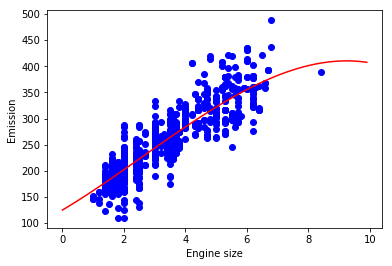

In [21]:
# Now, plotting the curve wrt the data
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
xx = np.arange(0.0,10.0,0.1) #This will give values with a difference of 0.1
yy = clf.intercept_ + clf.coef_[0][1]*xx + clf.coef_[0][2]*np.power(xx,2) + clf.coef_[0][3]*np.power(xx,3)
plt.plot(xx,yy,'-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.plot()

In [22]:
## THe above shows how we fit our model.

### Evaluation of the model

In [25]:
from sklearn.metrics import r2_score
test_x_poly = poly.fit_transform(test_x)
test_y_pred = clf.predict(test_x_poly)

#Now, we have the text_y_pred and the test-y and now we can use the same to tell the errors and the r2 score as well.
print("Mean absolute error %.2f" % np.mean(np.absolute(test_y_pred-test_y)))
print("Residual sum of squares (RSE) %.2f" % np.mean((test_y_pred-test_y)**2))

#R2 core, the more is, the better is the model
print("R2 score: ",r2_score(test_y_pred,test_y))

Mean absolute error 25.49
Residual sum of squares (RSE) 1104.95
R2 score:  0.6351147430714716


So, when it comes to polynomial regression, it just reduces to multiple linear regression and the r2 score will help us in identifying the better model or the better curve(Regression technique).Thats all about polynomial regression.